<center><h1>Gunadi_Eben_HW5</h1></center>
<br>
<br>

Name: Eben Gunadi
<br>
Github Username: egunadi
<br>
USC ID: 3976793880

## 1. Take the same image as you selected for doing the FFT and the Cosine Transform for previous homework, select a radius of your own choice in the frequency domain

### (a) Display the image.

Import packages

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct
from scipy.fftpack import idct
import pydicom
import os

Get the DICOM image

In [17]:
dicom_file = '../data/dcm/image12.dcm'
dicom_data = pydicom.dcmread(dicom_file)

# Extract pixel array from DICOM
dicom_image = dicom_data.pixel_array

# Save the original image as .png file
if not os.path.exists('../data/png'):
    os.makedirs('../data/png')

plt.imsave('../data/png/image12.png', dicom_image, cmap='gray')

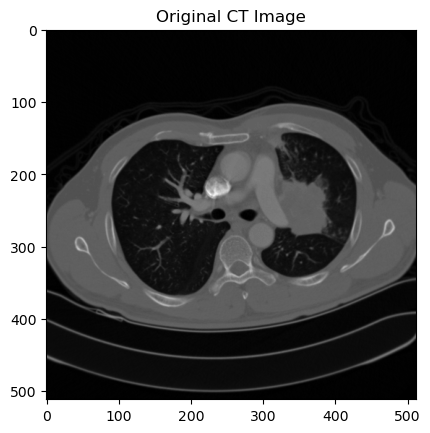

In [18]:
# Plot the image
plt.imshow(dicom_image, cmap='gray')
plt.title('Original CT Image')
plt.show()

### (b) Perform the Cosine Transform & display it.

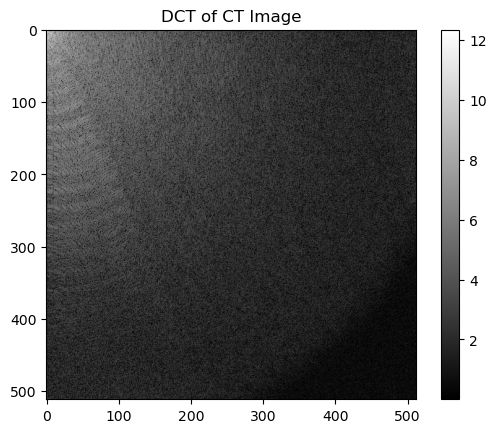

In [19]:
# Perform 2D Discrete Cosine Transform (DCT)
dct_transformed = dct(dct(dicom_image.T, norm='ortho').T, norm='ortho')

# Save the DCT image as .png file
plt.imsave('../data/png/image12_dct.png', np.log(abs(dct_transformed) + 1), cmap='gray')

# Plot the DCT result
plt.imshow(np.log(abs(dct_transformed) + 1), cmap='gray')
plt.title('DCT of CT Image')
plt.colorbar()
plt.show()

### (c) Pick a radius value & delete all frequency components outside of the radius & display it.

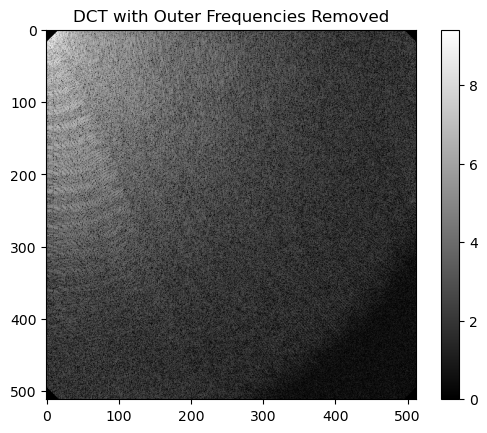

In [37]:
# Pick a radius value
radius = 350

# Create a circular mask directly
h, w = dct_transformed.shape
y, x = np.ogrid[:h, :w]
center = (h // 2, w // 2)
distance_from_center = np.sqrt((x - center[1])**2 + (y - center[0])**2)
mask = distance_from_center <= radius

# Apply the mask to the DCT-transformed image
dct_transformed_filtered = dct_transformed * mask

# Save and display the masked DCT image (log scale for visualization)
plt.imsave('../data/png/image12_dct_outer_removed.png', np.log(abs(dct_transformed_filtered) + 1), cmap='gray')

plt.imshow(np.log(abs(dct_transformed_filtered) + 1), cmap='gray')
plt.title('DCT with Outer Frequencies Removed')
plt.colorbar()
plt.show()

### (d) Compute the inverse transform & display it.
### (e) Please comment on the results.

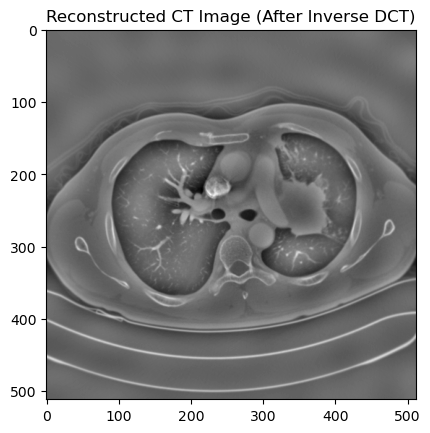

In [38]:
# Perform 2D Inverse Discrete Cosine Transform (IDCT)
dicom_image_filtered = idct(idct(dct_transformed_filtered.T, norm='ortho').T, norm='ortho')

# Save the filtered image as .png file
plt.imsave('../data/png/image12_reconstructed.png', dicom_image_filtered, cmap='gray')

# Plot the filtered image
plt.imshow(dicom_image_filtered, cmap='gray')
plt.title('Reconstructed CT Image (After Inverse DCT)')
plt.show()

### (f) Delete all frequency components inside the radius & display it.

## References and Citations

- https://scikit-image.org/docs/stable/user_guide/install.html